# Final phase 03 Project Submission

Please fill out:
* Student name: Ingavi Kilavuka
* Student pace: full time
* Scheduled project review date/time:
* Instructor name: Mwikali 

# Executive summary
The project's objective is to utilize data analytics and machine learning methods to improve customer experiences and decrease churn for Syriatel, a top mobile network provider in Syria. In the competitive telecommunications sector, retaining current customers and ensuring their satisfaction are crucial for Syriatel's long-term success and growth. The goals of this project include:
- Determining whether customers are indeed leaving
- How can we best predict the amount of customers leaving
- How can this data assist Syriatel improve customer satisfaction 


## Table of contents 
1. [Business Understanding](#1-business-understanding)
    1. [About Syriatel](#11-about-syriatel)
    1. [Stakeholders](#12-stakeholders)
    1. [Business Problem](#13-business-problem)

2. [Data Understanding](#2-data-understanding)
    1. [Univariate analysis](#21-univariate-anaylsis)
    1. [Bivariate analysis](#22-bivariate-analysis)

3. [Data Preparation](#3-data-preparation)
- Data Cleaning
- Models

## 1. Business understanding

### 1.1 About Syriatel
Syriatel (Arabic: سيريتل) is a leading mobile network provider in Syria, established in January 2000 with its headquarters in Damascus. It is one of the only two mobile service providers in the country, alongside MTN Syria. In 2022, Wafa Telecom was awarded the third telecom license by the Syrian telecommunications authority. Syriatel offers LTE services under the brand name Super Surf, providing speeds up to 150 Mb/s.

Initially, Syriatel operated under a Build-Own-Transfer (BOT) contract for 15 years, with management provided by Orascom. In 2017, the company introduced 4G services. On June 5, 2020, a Syrian court placed Syriatel under judicial custody.

### 1.2 Stakeholders
- **Customers:** Existing customers are directly affected by the company's efforts to reduce churn, which often lead to improved services, better customer support, and enhanced loyalty programs. Customers who experience better service are less likely to leave
- **Management:** Responsible for strategic decision-making, they are directly impacted by customer churn as it affects the company's revenue, profitability, and market position. High churn rates can indicate issues with customer satisfaction or service quality, prompting them to implement corrective measures 
- **Employees:** Job security and career growth for employees can be affected by churn. If high churn rates lead to financial losses, it might result in cost-cutting measures, including layoffs or reduced resources for employee development

### 1.3 Business Problem
Customer churn or attrition, is where customers stop doing business with a company or service provider over a given period.For Syriatel, customer churn happens when subscribers cancel their services or switch to a competitor. High churn rates can significantly impact the company's revenue and growth, making it crucial for businesses to implement strategies to reduce churn and retain customers.

Churn can be categorized into two types:

1. **Voluntary Churn:** This occurs when customers choose to leave a service on their own, often due to dissatisfaction with the service quality, better offers from competitors, or changes in their personal needs.

2. **Involuntary Churn:** This happens when the company terminates the customer's service, often due to non-payment or breaches of contract terms.

Understanding and addressing the factors contributing to churn is essential for Syriatel to maintain a stable customer base and ensure long-term success.


### 2. Data Understanding 

In [33]:
# Imports 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for Modeling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss



In [34]:
# Loading Dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv') 

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2.1 Univariate anaylsis

In [35]:
# Checking for information on data types and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [36]:
#Checking data shape
df.shape

(3333, 21)

In [37]:
# Checking dataset using descriptive statistics 
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [38]:
# Checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [39]:
# Checking for duplicate values
df.duplicated().sum()

0

### 2.2 Bivariate analysis

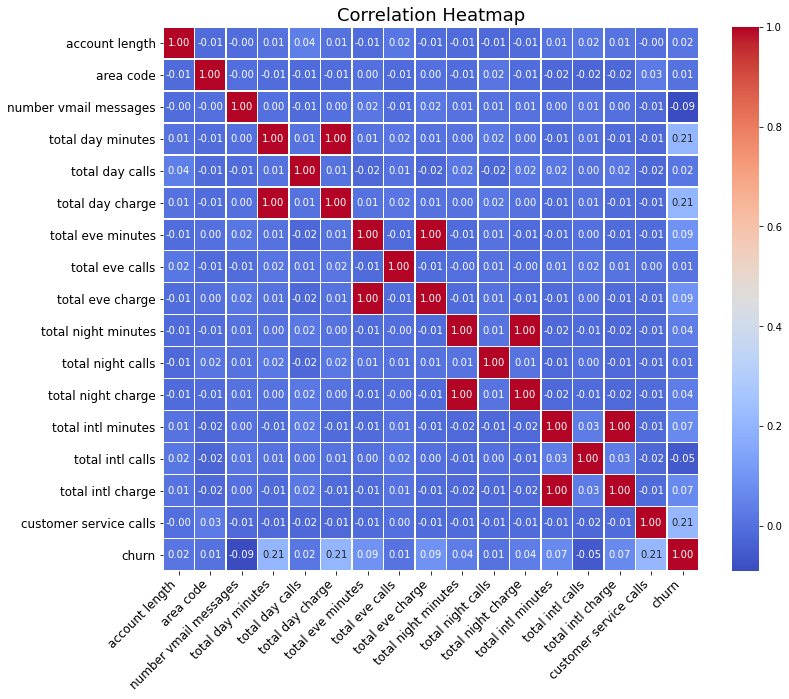

In [40]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

**Interpretation**

### 3. Data Preparation/Cleaning

In [41]:
#Dropping Phone number column as it is not useful
df.drop('phone number', axis=1, inplace=True)

In [42]:
# Checking that the column it's dropped.
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

<AxesSubplot:xlabel='churn', ylabel='count'>

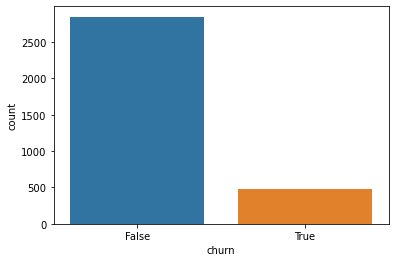

In [47]:
sns.countplot(data=df, x='churn')

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

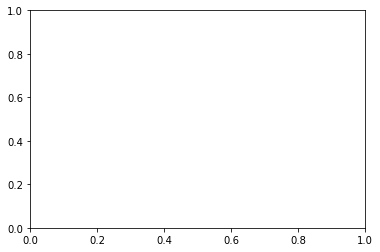

In [46]:
sns.boxplot(x=df['churn'])
plt.title('Boxplot of churn')
plt.show()